In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
import salem
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl

# General map format

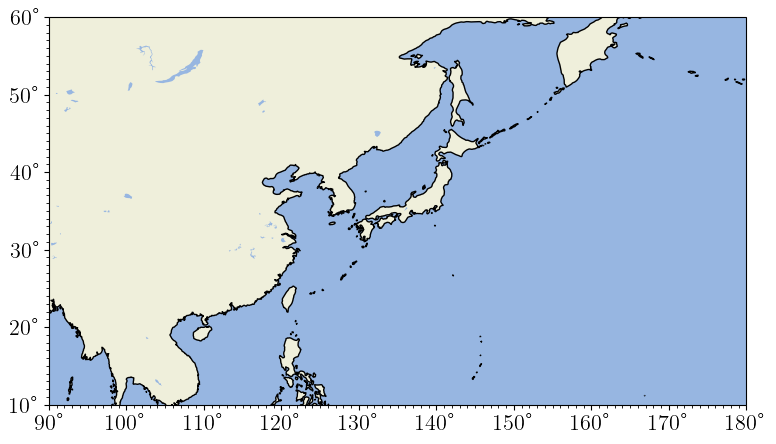

In [23]:
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
# ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([90,180,10,60],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(90,180+10,10))
ax.set_yticks(np.arange(10,60+10,10))

# not showing NSEW
cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
# latitude_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
# longitude_formatter = LongitudeFormatter(cardinal_labels=cardinal_labels)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, 
#                   xformatter=longitude_formatter, yformatter=latitude_formatter, 
#                   linewidth=0.6, color='#A9A9A9', alpha=0.5, linestyle='--')

# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

ax.coastlines()
ax.add_feature(cfeat.LAND.with_scale('50m'))
ax.add_feature(cfeat.OCEAN.with_scale('50m'))
ax.add_feature(cfeat.LAKES.with_scale('50m'))

# Path 1 maximum depth increase plot (`maxele.63`)

In [29]:
# general mesh info
file_14 = r'./path1_coarse/fort.14'
mesh_info = []
with open(file_14, 'r', encoding='utf-8') as f:
    for i in range(0,2):
        wz = f.readline()
        wz = wz.strip('\n')
        wz = wz.split(' ')
        print(wz)
        mesh_info.append(wz)

f.close()
ncell = int(mesh_info[1][0])
npoint = int(mesh_info[1][2])
print(ncell, npoint)

['OceanMesh2D', '']
['10164', '', '5640']
10164 5640


In [50]:
points = pd.read_csv(file_14, header=None, skiprows=2, nrows=npoint, sep='\s+')
# points.columns(['id', 'lon', 'lat', 'depth'])
points.rename(columns={0:'id', 1:'lon', 2:'lat', 3:'depth'}, inplace=True)
points

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\byy\AppData\Local\Temp\ipykernel_6712\1652316382.py:1: SyntaxWarning: invalid escape sequence '\s'
  points = pd.read_csv(file_14, header=None, skiprows=2, nrows=npoint, sep='\s+')


,id,lon,lat,depth
0,1,-77.003665,44.134602,0.200000
1,2,-77.009361,44.124481,3.538828
2,3,-77.015012,44.131475,2.930465
3,4,-77.011956,44.115294,4.332576
4,5,-77.024298,44.116779,3.895286
...,...,...,...,...
5635,5636,-79.797154,43.320959,2.104866
5636,5637,-79.788795,43.305184,5.499662
5637,5638,-79.793188,43.297912,3.535721
5638,5639,-79.799436,43.309847,2.279017


In [52]:
file_63 = r'./path1_coarse/maxele.63'
maxelev_data = pd.read_csv(file_63, header=None, skiprows=3, nrows=npoint, sep='\s+')
maxelev_data.rename(columns={0:'id', 1:'ele'}, inplace=True)
maxelev_data

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\byy\AppData\Local\Temp\ipykernel_6712\2514818460.py:2: SyntaxWarning: invalid escape sequence '\s'
  maxelev_data = pd.read_csv(file_63, header=None, skiprows=3, nrows=npoint, sep='\s+')


,id,ele
0,1,0.566958
1,2,0.567737
2,3,0.569733
3,4,0.563431
4,5,0.563052
...,...,...
5635,5636,0.336796
5636,5637,0.335129
5637,5638,0.333031
5638,5639,0.334342


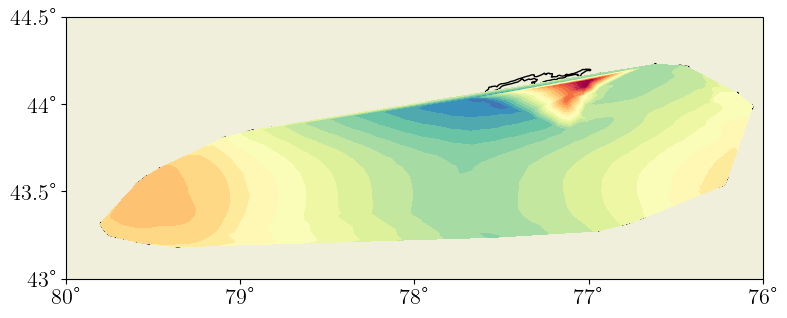

In [81]:
from cartopy.feature import ShapelyFeature
import shapely.vectorized

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection=proj)

ax.set_extent([-76,-80,43,44.5],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(-80,-76+1,1.0))
ax.set_yticks(np.arange(43,44.5+0.5,0.5))
# not showing NSEW
cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

# shp_gdf = gpd.read_file(r'./path1_coarse/GSHHS_l_L1.shp')
# mask = shapely.vectorized.contains(shp_gdf.dissolve().geometry.item(), points['lon'], points['lat'])
tcf = ax.tricontourf(points['lon'], points['lat'], maxelev_data['ele'], transform=proj, cmap='Spectral_r', levels=25, vmin=0.0, extend='max', zorder=10)
# tcf = ax.tricontourf(points['lon'], points['lat'], np.where(mask, maxelev_data['ele'], 0), transform=proj, cmap='Spectral_r', 
                     # levels=25, vmin=0.0, extend='max', zorder=15)
# cbar1 = fig.colorbar(tcf)
# cbar1.ax.set_title(r"$\zeta\ (m)$", fontsize=18)  
# # cbar1.ax.set_ylabel(r"$\bf{y_label}$",  labelpad=20, rotation=270) 

# mask the land
# shp_file = gpd.read_file(r'./path1_coarse/GSHHS_l_L1.shp')
shp_file = r'./path1_coarse/GSHHS_l_L1.shp'
shape_feature = ShapelyFeature(Reader(shp_file).geometries(), proj, facecolor='none')
ax.add_feature(shape_feature)

ax.coastlines()
ax.add_feature(cfeat.LAND.with_scale('50m'), zorder=1)